<a href="https://colab.research.google.com/github/rohanskalyani/ger_classification/blob/main/Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

### Initial Testing

In [ ]:
ger_dim_shp = pd.read_csv('https://raw.githubusercontent.com/rohanskalyani/ger_classification/main/yurt_dimension_shape.csv', header = 0, index_col = 0)
ger_dim_shp.head()

,duureg,area,yurt,circ_compact,new_area,squareness,convexity,elongation,perimeter,EquivalentRectangularIndex,fractal,longest_axis_length
0,Bagakhangai,2021.889360,0,0.532362,2.407880e-07,NaN,1.0,0.834025,0.001978,91283.441782,-1.999982,0.000759
1,Bagakhangai,1811.358912,0,0.502535,2.157171e-07,NaN,1.0,0.766171,0.001884,91166.322565,-2.042350,0.000739
2,Bagakhangai,1760.263359,0,0.473111,2.096347e-07,NaN,1.0,0.514535,0.001917,92419.530310,-2.045511,0.000751
3,Bagakhangai,2288.734374,0,0.465759,2.725703e-07,NaN,1.0,0.481073,0.002212,92375.154082,-1.939112,0.000863
4,Bagakhangai,377.006317,0,0.306372,4.488263e-08,NaN,1.0,0.290512,0.001000,92937.052597,-2.796100,0.000432


In [ ]:
ger_dim_shp.describe()

,area,yurt,circ_compact,new_area,squareness,convexity,elongation,perimeter,EquivalentRectangularIndex,fractal,longest_axis_length
count,255262.000000,255262.000000,255262.000000,2.552620e+05,0.0,255262.000000,255262.000000,255262.000000,255262.000000,255262.000000,255262.000000
mean,126.448090,0.141047,0.538727,3.579766e+00,NaN,0.982787,0.620112,2.507336,77750.033884,-3.563067,0.805333
std,430.467957,0.348071,0.202438,9.862607e+00,NaN,0.047691,0.217951,6.289422,31970.842767,1.979765,2.023480
min,1.043309,0.000000,0.024920,3.594485e-09,NaN,0.184503,0.022024,0.000220,0.768860,-5.767932,0.000079
25%,36.916493,0.000000,0.413941,6.089633e-09,NaN,1.000000,0.463015,0.000333,85065.566349,-4.788469,0.000130
50%,62.549880,0.000000,0.481279,9.669225e-09,NaN,1.000000,0.608126,0.000424,91203.744168,-4.173209,0.000166
75%,100.584544,0.000000,0.605750,2.157574e-08,NaN,1.000000,0.736866,0.000658,91767.494930,-3.360820,0.000258
max,47895.996377,1.000000,0.985859,1.136112e+03,NaN,1.000000,1.000000,187.530152,102050.155079,1.130901,66.202638


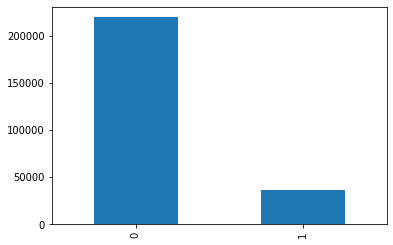

In [ ]:
ger_dim_shp['yurt'].value_counts().plot(kind = 'bar')

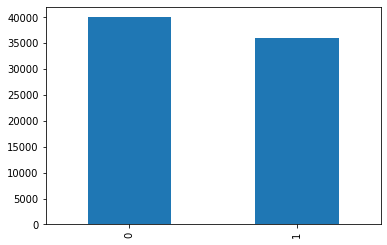

In [ ]:
yurt = ger_dim_shp.loc[ger_dim_shp['yurt'] == 1]
nonyurt = ger_dim_shp.loc[ger_dim_shp['yurt'] == 0].sample(40000)
class_bal = pd.concat([yurt,nonyurt])
class_bal['yurt'].value_counts().plot(kind = 'bar')

In [ ]:
# y= ger_dim_shp['yurt']
# X = ger_dim_shp.drop(['yurt', 'squareness', 'duureg', 'area', 'convexity'], axis = 'columns')

y = class_bal['yurt'] 
X = class_bal.drop(['yurt', 'squareness', 'duureg', 'area', 'convexity'], axis = 'columns')

Experiment 1: Logistic Regression

In [ ]:
clf = LogisticRegressionCV(cv = 5, n_jobs = -1).fit(X, y)
print(roc_auc_score(y, clf.predict_proba(X)[:, 1]))
#clf.predict_proba(X)[:, 1]

1.0

In [ ]:
clf.scores_

{1: array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])}

In [ ]:
clf = LogisticRegressionCV(cv = 5, random_state = 0).fit(ger_dim_shp[['new_area', 'area']], y)

In [ ]:
clf.score(ger_dim_shp[['new_area', 'area']], y)

1.0

In [ ]:
import numpy as np

X['rand'] = [np.random.random() for k in X.index]
X

,circ_compact,new_area,elongation,perimeter,EquivalentRectangularIndex,fractal,longest_axis_length,rand
0,0.532362,2.407880e-07,0.834025,0.001978,91283.441782,-1.999982,0.000759,0.276817
1,0.502535,2.157171e-07,0.766171,0.001884,91166.322565,-2.042350,0.000739,0.156439
2,0.473111,2.096347e-07,0.514535,0.001917,92419.530310,-2.045511,0.000751,0.104776
3,0.465759,2.725703e-07,0.481073,0.002212,92375.154082,-1.939112,0.000863,0.113234
4,0.306372,4.488263e-08,0.290512,0.001000,92937.052597,-2.796100,0.000432,0.274829
...,...,...,...,...,...,...,...,...
255257,0.978765,3.405623e+01,0.999124,20.783066,1.123178,0.934149,6.656014,0.273849
255258,0.978568,2.832507e+01,0.998532,18.953439,1.123201,0.930508,6.070787,0.457181
255259,0.977603,2.173667e+01,0.995343,16.603582,1.123197,0.924536,5.320717,0.060644
255260,0.977964,2.036535e+01,0.996374,16.071722,1.123167,0.922922,5.149198,0.774071


In [ ]:
clf = LogisticRegressionCV(n_jobs = -1, cv = 5)
clf.fit(X['rand'].values.reshape(-1,1), y)

LogisticRegressionCV(cv=5, n_jobs=-1)

In [ ]:
clf.score(X['rand'].values.reshape(-1,1), y)

0.8589527622599525

In [ ]:
clf.scores_

{1: array([[0.8589505 , 0.8589505 , 0.8589505 , 0.8589505 , 0.8589505 ,
         0.8589505 , 0.8589505 , 0.8589505 , 0.8589505 , 0.8589505 ],
        [0.8589505 , 0.8589505 , 0.8589505 , 0.8589505 , 0.8589505 ,
         0.8589505 , 0.8589505 , 0.8589505 , 0.8589505 , 0.8589505 ],
        [0.85896733, 0.85896733, 0.85896733, 0.85896733, 0.85896733,
         0.85896733, 0.85896733, 0.85896733, 0.85896733, 0.85896733],
        [0.85894774, 0.85894774, 0.85894774, 0.85894774, 0.85894774,
         0.85894774, 0.85894774, 0.85894774, 0.85894774, 0.85894774],
        [0.85894774, 0.85894774, 0.85894774, 0.85894774, 0.85894774,
         0.85894774, 0.85894774, 0.85894774, 0.85894774, 0.85894774]])}

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegressionCV(cv = 5, n_jobs = -1).fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

Experiment 2: Random Forest

In [ ]:
clf_2 = RandomForestClassifier(n_jobs = -1, oob_score = True)
clf_2.fit(X,y)

RandomForestClassifier(n_jobs=-1, oob_score=True)

In [ ]:
clf_2.score(X,y)

1.0

In [ ]:
roc_auc_score(y, clf_2.predict_proba(X)[:,1])

1.0

In [ ]:
clf_2.feature_importances_

array([0.03974842, 0.21012159, 0.        , 0.18005738, 0.26007682,
       0.10999472, 0.20000106])

In [ ]:
clf_2.feature_names_in_

array(['circ_compact', 'new_area', 'convexity', 'elongation', 'perimeter',
       'EquivalentRectangularIndex', 'fractal', 'longest_axis_length'],
      dtype=object)

In [ ]:
pd.DataFrame({'Features': clf_2.feature_names_in_, 'Feature Importances':clf_2.feature_importances_ })

,Features,Feature Importances
0,circ_compact,0.039748
1,new_area,0.210122
2,elongation,0.000000
3,perimeter,0.180057
4,EquivalentRectangularIndex,0.260077
5,fractal,0.109995
6,longest_axis_length,0.200001


[Text(0.5, 0.75, 'longest_axis_length <= 0.589\ngini = 0.499\nsamples = 76004\nvalue = [40000, 36004]\nclass = Ger'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 40000\nvalue = [40000, 0]\nclass = Ger'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 36004\nvalue = [0, 36004]\nclass = Not Ger')]

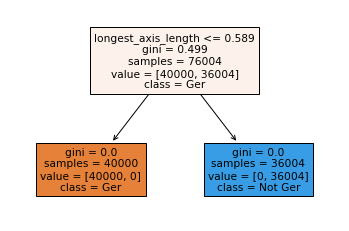

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier()
clf.fit(X,y)

plot_tree(clf, feature_names = X.columns, class_names = ['Ger', 'Not Ger'], filled = True)


### Final Model Training and Tuning

In [4]:
yurt_balanced = pd.read_csv('/content/drive/MyDrive/final_balanced_yurt.csv', header = 0, index_col = 0)
all_bldgs = pd.read_csv('/content/drive/MyDrive/final_full_bld.csv', header = 0, index_col = 0)

In [5]:
yurt_balanced

,building,duureg,area,geometry,yurt,new_area,perimeter,longest_axis_length,circ_compact,squareness,convexity,elongation,EquivalentRectangularIndex,fractal,shared_walls_ratio,uID,predictions
0,ger,Songinokhairkhan,19.921489,MULTIPOLYGON (((629447.992163519 5308071.51880...,1,19.921489,16.090885,5.211475,0.933922,NaN,1.000000,0.950350,1.109895,0.930516,-2.207904e-16,0,1
1,ger,Songinokhairkhan,18.813264,MULTIPOLYGON (((626068.1315380472 5311134.5137...,1,18.813264,15.636989,5.071900,0.931178,NaN,1.000000,0.946892,1.109943,0.929164,0.000000e+00,1,1
2,ger,Songinokhairkhan,23.761999,MULTIPOLYGON (((636193.8176769712 5317044.3977...,1,23.761999,17.747201,5.805732,0.897592,NaN,1.000000,0.999111,1.098681,0.940589,0.000000e+00,2,1
3,ger,Songinokhairkhan,22.664676,MULTIPOLYGON (((637331.5457693868 5308800.3573...,1,22.664676,16.954748,5.431605,0.978145,NaN,1.000000,0.995724,1.123167,0.925564,0.000000e+00,3,1
4,ger,Songinokhairkhan,30.363654,MULTIPOLYGON (((637208.9963009879 5309018.3636...,1,30.363654,19.624264,6.283401,0.979207,NaN,1.000000,0.996301,1.123167,0.931941,-1.810368e-16,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240027,yes,Songinokhairkhan,30.390198,MULTIPOLYGON (((632083.4677037897 5309112.3828...,0,30.390198,19.632804,6.286914,0.978968,NaN,1.000000,0.993978,1.123172,0.931958,1.809580e-16,276031,1
1521,house,Baganuur,152.419376,MULTIPOLYGON (((752592.9392267548 5298426.2276...,0,152.419376,54.432394,19.242388,0.524122,NaN,0.903633,0.927323,0.907887,1.038733,0.000000e+00,37525,1
183041,yes,Songinokhairkhan,37.179167,MULTIPOLYGON (((632465.1444190345 5309541.5784...,0,37.179167,21.715669,6.956082,0.978319,NaN,1.000000,0.996222,1.123149,0.935762,0.000000e+00,219045,1
111604,yes,Chingeltei,202.015371,MULTIPOLYGON (((641041.1893958537 5324591.0610...,0,202.015371,57.223343,20.374502,0.619613,NaN,1.000000,0.795711,1.000018,1.002447,0.000000e+00,147608,1


In [5]:
y = yurt_balanced['yurt'] 
X = yurt_balanced.drop(['yurt', 'building', 'squareness', 'duureg', 'new_area', 'geometry', 'convexity', 'shared_walls_ratio', 'uID', 'predictions'], axis = 'columns')
X

,area,perimeter,longest_axis_length,circ_compact,elongation,EquivalentRectangularIndex,fractal
0,19.921489,16.090885,5.211475,0.933922,0.950350,1.109895,0.930516
1,18.813264,15.636989,5.071900,0.931178,0.946892,1.109943,0.929164
2,23.761999,17.747201,5.805732,0.897592,0.999111,1.098681,0.940589
3,22.664676,16.954748,5.431605,0.978145,0.995724,1.123167,0.925564
4,30.363654,19.624264,6.283401,0.979207,0.996301,1.123167,0.931941
...,...,...,...,...,...,...,...
240027,30.390198,19.632804,6.286914,0.978968,0.993978,1.123172,0.931958
1521,152.419376,54.432394,19.242388,0.524122,0.927323,0.907887,1.038733
183041,37.179167,21.715669,6.956082,0.978319,0.996222,1.123149,0.935762
111604,202.015371,57.223343,20.374502,0.619613,0.795711,1.000018,1.002447


In [ ]:
acc = []
f1 = []
roc_auc = []

for i in range(10):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

  clf = RandomForestClassifier(n_estimators = 200, random_state=i, n_jobs = -1, oob_score = True)
  clf.fit(X_train,y_train)
  acc.append(accuracy_score(y_test, clf.predict(X_test)))
  f1.append(f1_score(y_test, clf.predict(X_test)))
  roc_auc.append(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))

In [8]:
clf = RandomForestClassifier(n_estimators = 200, n_jobs = -1, oob_score = True)
clf.fit(X,y)

RandomForestClassifier(n_estimators=200, n_jobs=-1, oob_score=True)

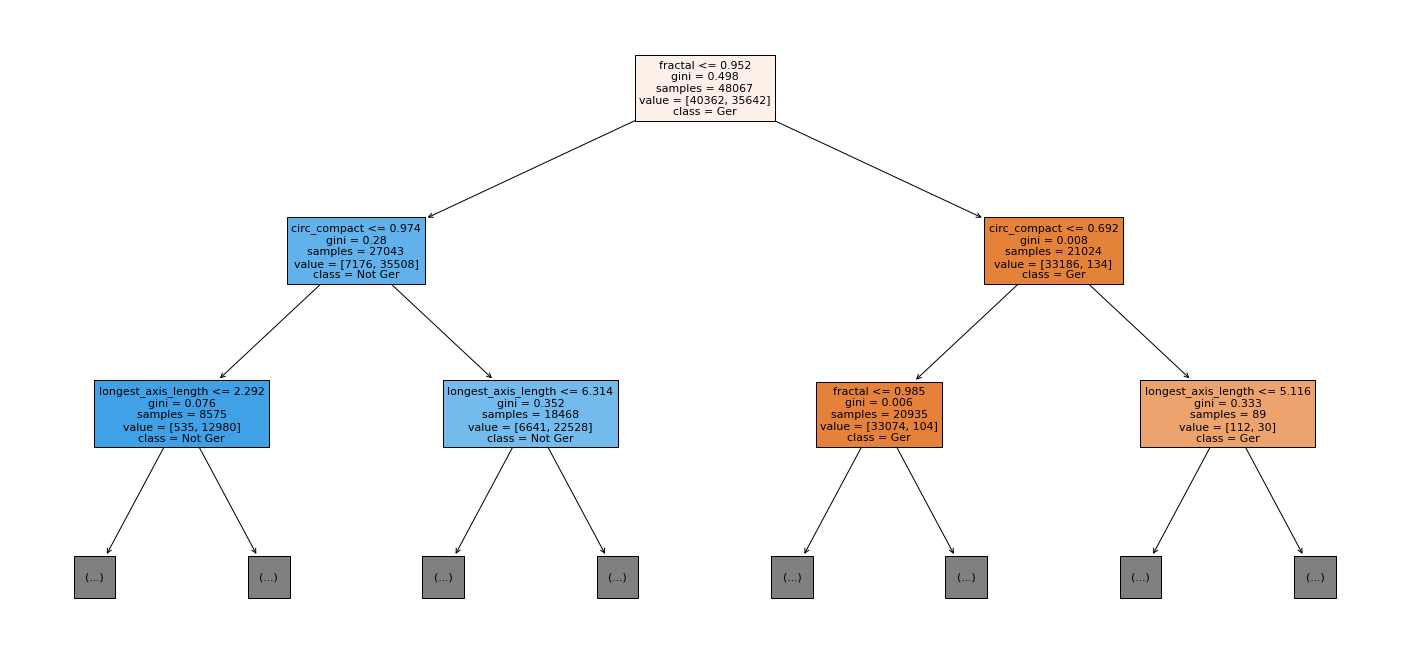

In [12]:
fig, ax  = plt.subplots(figsize = (25,12))
plot_tree(clf.estimators_[1], max_depth = 2, feature_names = X.columns, class_names = ['Ger', 'Not Ger'], filled = True, ax = ax)
plt.savefig('decision_tree.png', dpi = 300, bbox_inches = 'tight')

In [10]:
import numpy as np
print('Accuracy:', np.mean(acc))
print('F1 Score:', np.mean(f1))
print('ROC-AUC:', np.mean(roc_auc))

Accuracy: 0.9194197750148018
F1 Score: 0.9178023589504545
ROC-AUC: 0.9768628491951136


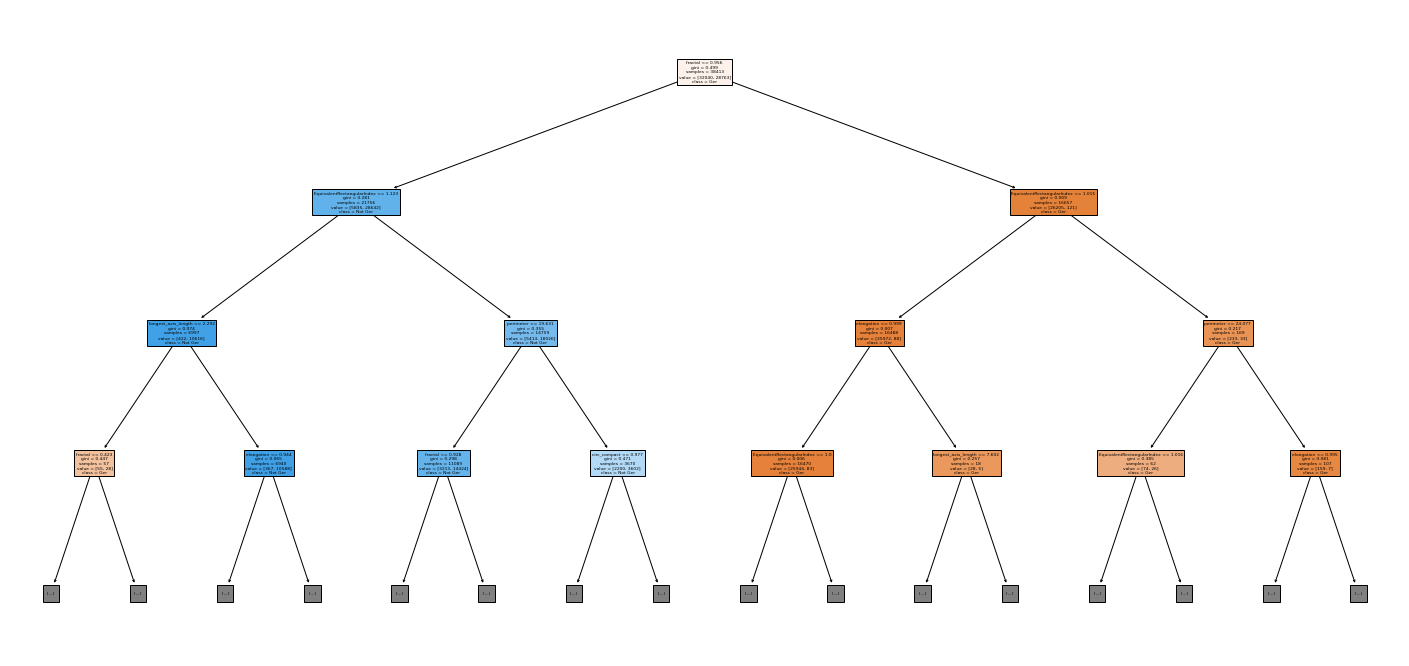

In [35]:
fig, ax  = plt.subplots(figsize = (25,12))
plot_tree(clf.estimators_[5], max_depth = 3, feature_names = X.columns, class_names = ['Ger', 'Not Ger'], filled = True, ax = ax)
plt.savefig('decision_tree', dpi = 300, bbox_inches = 'tight')

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

acc = []
f1 = []
roc_auc = []

param_grid = {'linearsvc__C': np.linspace(0.0001, 0.1, 100)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

pipeline = make_pipeline(StandardScaler(), LinearSVC())
gcv = GridSearchCV(pipeline, param_grid = param_grid, n_jobs = -1, cv = 5)
gcv.fit(X_train,y_train)
# acc.append(accuracy_score(y_test, clf.predict(X_test)))
# f1.append(f1_score(y_test, clf.predict(X_test)))
# roc_auc.append(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))

KeyboardInterrupt: ignored

In [37]:
#gcv.best_params_
print(accuracy_score(y_test, gcv.predict(X_test)))
print(f1_score(y_test, gcv.predict(X_test)))
#print(roc_auc_score(y_test, gcv.predict_proba(X_test)[:,1]))

NotFittedError: ignored

In [41]:
acc = []
f1 = []
roc_auc = []

for i in range(100):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

  gnb = GaussianNB()
  gnb.fit(X_train,y_train)
  acc.append(accuracy_score(y_test, gnb.predict(X_test)))
  f1.append(f1_score(y_test, gnb.predict(X_test)))
  roc_auc.append(roc_auc_score(y_test, gnb.predict_proba(X_test)[:,1]))

print('Accuracy:', np.mean(acc))
print('F1 Score:', np.mean(f1))
print('ROC-AUC:', np.mean(roc_auc))

Accuracy: 0.9028938885599632
F1 Score: 0.9064309961838639
ROC-AUC: 0.9146712119351494


In [ ]:
acc = []
f1 = []
roc_auc = []

for i in range(100):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

  gnb = GaussianNB()
  gnb.fit(X_train,y_train)
  acc.append(accuracy_score(y_test, gnb.predict(X_test)))
  f1.append(f1_score(y_test, gnb.predict(X_test)))
  roc_auc.append(roc_auc_score(y_test, gnb.predict_proba(X_test)[:,1]))

print('Accuracy:', np.mean(acc))
print('F1 Score:', np.mean(f1))
print('ROC-AUC:', np.mean(roc_auc))